# PRÁCTICA 1

In [123]:
#Importacion de la biblioteca de numpy con el alias np
import numpy as np
#Importacion de la biblioteca matplotlib con el alias plt
%matplotlib inline
import matplotlib.pyplot as plt
#Importacion de la biblioteca sympy con el alias sp
import sympy as sp
#Importacion de la biblioteca decimal (trabajar con precision ajustada)
from decimal import *
mporig = getcontext().prec
#Importación de la función fsolve
from scipy.optimize import fsolve
#Importación de los solucionadores de sympy
from sympy.solvers import solve, nsolve, solveset
#Importación de los métodos ceil y floor de la biblioteca Math
from math import ceil, floor

x = sp.Symbol('x')

## Ejercicio 0
En este ejercicio planteo otra forma de escribir el código del método de bisección para la resolución de ecuaciones no lineales.
No difiere mucho del código original. El objetivo de hacer este ejercicio es para familiarizarme con el lenguaje y con el métido en sí.

In [124]:
# Método de bisección
'''
num_it = 0


for i in range(nmax):
    c = (a+b)/2
    num_it=num_it+1
    if (abs(f(c)) < prec):
        print("Se ha alcanzado la precisión requerida. Posible sol: ", c) 
        break
    if (f(a)*f(c) < 0):
         b = c
    else: 
        a = c
    if b-a < tol:
        print("Intervalo con mucha precisión. Aproximación solicitada: ", c) 
        break

print("Solución exacta: ", sol_exact)
print("Numero de iteraciones requerido: ", num_it)

'''

'\nnum_it = 0\n\n\nfor i in range(nmax):\n    c = (a+b)/2\n    num_it=num_it+1\n    if (abs(f(c)) < prec):\n        print("Se ha alcanzado la precisión requerida. Posible sol: ", c) \n        break\n    if (f(a)*f(c) < 0):\n         b = c\n    else: \n        a = c\n    if b-a < tol:\n        print("Intervalo con mucha precisión. Aproximación solicitada: ", c) \n        break\n\nprint("Solución exacta: ", sol_exact)\nprint("Numero de iteraciones requerido: ", num_it)\n\n'

## Ejercicio 0.5

Modifique cualquiera de estos códigos con el objeto de implementar el conocido algoritmo de regula-falsi, en el que se obtiene el punto $c$ no como el punto medio entre $a$ y $b$, sino como el punto de corte con el eje $Ox$ de la recta que une los puntos $(a,f(a))$ y $(b,f(b))$, tal y como se muestra también en el siguiente método de la secante.

In [125]:
# Método regula-falsi
'''
num_it = 0

for i in range(nmax):
    c = b - ((a-b)*f(b))/(f(a)-f(b))
    num_it=num_it+1
    if (abs(f(c)) < prec):
        print("Se ha alcanzado la precisión requerida. Posible sol: ", c) 
        break
    if (f(a)*f(c) < 0):
         b = c
    else: 
        a = c
    if b-a < tol:
        print("Intervalo con mucha precisión. Aproximación solicitada: ", c) 
        break

print("Solución exacta: ", sol_exact)
print("Numero de iteraciones requerido: ", num_it)
'''

'\nnum_it = 0\n\nfor i in range(nmax):\n    c = b - ((a-b)*f(b))/(f(a)-f(b))\n    num_it=num_it+1\n    if (abs(f(c)) < prec):\n        print("Se ha alcanzado la precisión requerida. Posible sol: ", c) \n        break\n    if (f(a)*f(c) < 0):\n         b = c\n    else: \n        a = c\n    if b-a < tol:\n        print("Intervalo con mucha precisión. Aproximación solicitada: ", c) \n        break\n\nprint("Solución exacta: ", sol_exact)\nprint("Numero de iteraciones requerido: ", num_it)\n'

#### Salida:
    Intervalo con mucha precisión. Aproximación solicitada:  1.0986122886618854

    Solución exacta:  log(3)

    Numero de iteraciones requerido:  1

---------------------------------------------------------------------------------------------------------------------------

# RELACIÓN DE EJERCICIOS

---------------------------------------------------------------------------------------------------------------------------

Función destinada al cálculo de raíces de una función dada, en una variable dada.

In [126]:
def sol_exact(f,x,todas=True):
    # Función que calcula las soluciones de una ecuación
    try:
        soluciones = sp.solve(f(x),x)
        num_sols   = len(soluciones)
        if todas==True:
            print("Se han encontrado : {} soluciones".format(num_sols))
            for i in range(num_sols):
                print("Solución {}: {}".format(i+1,soluciones[i].evalf()))
        return soluciones,num_sols
    except NotImplementedError:
        print("No existen soluciones para esta ecuación : {}".format(f(x))) 

In [127]:
# Función que, en caso de que en la llamada al método de bisección, no se aporten cifras de precision, calcula
# estas en función de la precisión indicada como argumento.
def calc_cifras(precision):
    
    return int(np.ceil(abs(np.log10(precision))))

In [128]:
#Función que permite calcular el número de iteraciones necesarias en el método de bisección para llegar a la aproximación de la solución, con un
#error dado
def num_iter(a,b,cifras):
    
    n = np.log((b-a)/10**(-cifras))/np.log(2) - 1
    return ceil(n)

### Método de Bisección

In [129]:
# Método de bisección
# Vamos a encapsular el método de bisección en una función

def biseccion (a, b, f, cifras=16,muestra=True, nmax=100, prec=10**(-16)):

    niter = 0
    terms = []

    if (cifras <= 0):
        cifras = calc_cifras(prec)
     
    tol = 10**(-cifras+1)
    getcontext().prec = cifras
    
    a=Decimal(a)
    b=Decimal(b)

    for i in range(nmax):
        niter = niter + 1
        c = (a+b)/2
        terms.append(float(c))
        if (abs(f(c)) < prec):
            p = "Precision"
            break
        if (f(a)*f(c) <= 0):
            b = c
        else: 
            a = c
        if b-a < tol:
            p = "Tolerance"
            break
    
    if (muestra):
        print("MÉTODO DE BISECCIÓN APLICADO A LA ECUACIÓN: ", f(x))
        
        if (p == "Precision"):
            print("Se ha alcanzado la precisión requerida. Posible solución exacta: ", c )
        elif niter < nmax:
            print("Aproximación con decimales: ", c)
        else:
            print("Intervalo con maxima tolerancia. Aproximación solicitada: ", c)

        print("Numero de iteraciones requerido: ", niter)

    return terms


### Método de Newton-Raphson

In [130]:
# Método de Newton-Raphson
# Vamos a encapsular el método de Newton-Raphson en una función
def newton_raphson(b, f, deriv, cifras=16, muestra=True, nmax=100, prec=10**(-16)):

    x0=Decimal(b)
    
    tol = 10**(-cifras+1)

    getcontext().prec = cifras

    niter = 0
    terms = [b]

    for k in range(nmax):
        niter = niter + 1
        x1 = x0 - f(x0)/deriv(x0)  # método de Newton-Raphson
        terms.append(float(x1))
        if abs(x1-x0) < tol:
            p = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            p = 'precision'
            break
        else:
            x0 = x1

    if (muestra):
        #print("MÉTODO DE NEWTON-RAPHSON APLICADO A LA ECUACIÓN: ", f(x))
        if (p == "Precision"):
            print("Se ha alcanzado la precisión requerida. Posible aproximación: ", x1)
        else:
            print("Intervalo con maxima tolerancia. Aproximación solicitada: ", x1)

        print("Numero de iteraciones requerido: ", niter)

    getcontext().prec = mporig # Se restaura la precisión por defecto

    return terms

In [131]:
# Función que determina si una función cambia de signo en un intervalo dado:
def sgn(f,a,b):
    if f(a)*f(b) < 0:
        print("Sí hay cambio de signo: Hay raíz")
    else:
        print("No hay cambio de signo: No hay raíz")

# EJERCICIO 1

Demuestre que la ecuación  $x^3+4 x^2=10  $  tiene una única raíz en el intervalo $[1,2]$.  Aproxime dicha raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para conseguir 5 cifras decimales exactas (tol =$10^{-5}$)?  Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$.

Probemos en primer lugar que dicha ecuación posee una única ecuación. Sea $f: [1,2] \rightarrow [1,2]$ la aplicación dada por $f(x) = x^{3} + 4x^{2} - 10$, la cual claramente es continua en todo el intervalo y además derivable por ser una función polinómica (en particular es derivable en todo $\mathbb{R}$). Es por ello que podemos aplicar el **teorema de Bolzano** para comprobar que la ecuación tiene **al menos** una raíz real: si $f(1) \cdot f(2) < 0$ entonces la función posee al menos una raíz real en el intervalo $[1,2]$. Veámoslo haciendo uso de una función de python que determina si hay cambio de signo en el intervalo y, por consiguiente, si hay raíz dentro del mismo:





In [132]:
a = 1; b = 2

In [133]:
def f(x):

    return x**3 + 4*x**2 - 10

In [134]:
sgn(f,a,b)

Sí hay cambio de signo: Hay raíz


La función nos informa por tanto de que $f(1)\cdot f(2) < 0$ así que el Teorema de Bolzano nos dice que la función posee al menos una raíz en el intervalo $[1,2]$.

Probemos ahora que dicha solución, necesariamente ha de ser única. Calculemos la derivada de $f$:

> $f^{'}(x) = 3x^{2} + 8x^{2}$

Claramente, $f'(x) > 0 \forall x \in [1,2]$. Es por ello que la función $f$ es estrictamente creciente en dicho intervalo y, por consiguiente, de cortar al eje $OX$, solo lo hará una única vez. Concluimos por tanto que la raíz que el teorema de Bolzano afirmaba que existía, es única.

A continuación, vamos a aproximar dicha raíz con al menos 3 cifras decimales exactas, aplicando para ello el método de bisección:

In [135]:
sol,n = sol_exact(f,x)

Se han encontrado : 3 soluciones
Solución 1: -2.68261500670705 - 0.358259359924043*I
Solución 2: -2.68261500670705 + 0.358259359924043*I
Solución 3: 1.36523001341410


In [136]:
# Calculemos la aproximación de la solución requerida

# Número de cifras significativas
cifras = 4
#Aplicamos método de Bisección
bise = biseccion(a,b,f,cifras,True)

MÉTODO DE BISECCIÓN APLICADO A LA ECUACIÓN:  x**3 + 4*x**2 - 10
Aproximación con decimales:  1.365
Numero de iteraciones requerido:  10


A continuación vamos a estimar el número de iteraciones necesarias para conseguir 5 cifras decimales exactas (tol =$10^{-5}$).

El método de bisección nos permite calcular previamente el número de iteraciones necesarias para obtener la solución con un error inferior a uno dado. Efectivamente, si partimos por ejemplo del único intervalo de amplitud unidad en el que se encuentra la solución $s$, el $[1,2]$ y deseamos una solución con error menor que $10^{-5}$, entonces, teniendo en cuenta que según el Teorema que expone las propiedades del método de bisección: "La sucesión de errores $\{e_{n}\}_{n\geq 0}$ cumple $|e_{n}| < \frac{1}{2^{n+1}} (b-a)$", podemos imponer

<center>

$|e_{n}| < \frac{2-1}{2^{n+1}} \leq 10^{-5}$

</center>

de donde

<center>

$2^{n+1} \geq \frac{1}{10^{-5}} \Rightarrow n \geq log_{2}\frac{1}{10^{-5}} - 1 = \frac{ln \frac{1}{10^{-5}}}{ln 2} - 1$

</center>

Así, obtenemos que 

<center>

$n \geq \frac{ln \frac{1}{10^{-5}}}{ln 2} - 1 \Longleftrightarrow n \geq 15.60964047 ... \Rightarrow n = 16$

</center>

Para obtener un error inferior a $10^{-5}$ con el método de bisección son necesarias $16$ iteraciones.

Hecho que podemos comprobar con la salida de la función:

In [137]:
cifras = 5
print("Número de iteraciones necesarias para obtener un error inferior a 10⁻⁵: ", num_iter(a,b,cifras) )

Número de iteraciones necesarias para obtener un error inferior a 10⁻⁵:  16


Por último vamos a hallar la aproximación de la solución con el método de Newton-Raphson hasta conseguir un error inferior a $10^{-3}$

In [138]:
def deriv(x):
    return 3*x**2+8*x

In [139]:
# Calculemos la aproximación de la solución requerida
v0 = 1
cifras = 4
nr = newton_raphson(v0,f,deriv,cifras,True)

Intervalo con maxima tolerancia. Aproximación solicitada:  1.365
Numero de iteraciones requerido:  4


# EJERCICIO 2

Encuentre una aproximación de la raíz cúbica de 25 con dos decimales exactos (tol =$10^{-2}$), usando el algoritmo de bisección.


Sea $g: \mathbb{R} \longrightarrow \mathbb{R}$ una aplicación dada por $g(x) = \sqrt[3]{x}$, que es claramente continua y derivable en todo su dominio de definición. Vamos a hacer una aproximación de dicha función aplicada al valor $25$ con dos decimales exactos. Es por ello que previamente a llevar a cabo dicho proceso de aproximación, vamos a ver cuál es el valor exacto de la raíz que se nos pide:

In [140]:
# Definición de la función raíz cúbica de x
def g(x):
    return x**(1/3)

cifras = 3 # tres cifras significativas de precisión.
getcontext().prec = int(cifras)

n = float(25)
g(n)
# comprobamos la solución exacta
print("Valor exacto: ", round(g(n), cifras-1))

Valor exacto:  2.92


Procedamos ahora a aplicar el método de bisección para aproximar dicha raíz a dos decimales exactos. Para ello, en primer lugar, observamos que podemos ver el enunciado del ejercicio desde otra perspectiva:

Sea $x$ el valor que buscamos

<center>

$x = \sqrt[3]{25} \Longleftrightarrow x^{3} - 25 = 0$

</center>

Ahora sea $h: \mathbb{R} \longrightarrow \mathbb{R}$ la aplicación dada por $h(x) = x^{3} - 25$, continua y derivable también en su dominio. El ejercicio se reduce a calcular una de sus raíces reales. Apliquemos entonces el método de bisección a esta función en el intervalo $[2,3]$:


In [141]:
def h(x):
    
    return x**3 - 25

v1 = 2; v2 = 3

In [142]:
bise = biseccion(v1,v2,h,cifras,True)

MÉTODO DE BISECCIÓN APLICADO A LA ECUACIÓN:  x**3 - 25
Aproximación con decimales:  2.93
Numero de iteraciones requerido:  7


# EJERCICIO 3

Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con tolerancia $10^{-5}$ , partiendo de un valor adecuado, próximo a cada una de ellas en cada caso.

i) $x^3-x-1 = 0$  en $[1,2]$.

ii) $3x=2+x^2-e^x$.

iii) $x^2+10\, cos x+x=0$.


Definamos en primer lugar todas las funciones dadas junto con su funcion derivada. Cada una de ellas es continua y derivable en $\mathbb{R}$:

In [143]:
def f_1(x):

    return x**3 - x - 1

def df_1(x):

    return 3*x**2 - 1

def f_2(x):

    return 3*x-2-x**2+np.exp(x)

def f_2_S(x):

    return 3*x-2-x**2+sp.exp(x)

def df_2(x):

    return 3 -2*x + np.exp(x)

def f_3(x):

    return x**2+10*np.cos(x) + x

def f_3_S(x):

    return x**2+10*sp.cos(x) + x

def df_3(x):

    return 2*x-10*sp.sin(x) + 1


#### Función 1:

Hallemos en primer lugar las zaíces de la función 1:

In [144]:
v1 = sol_exact(f_1,x,todas=True)

Se han encontrado : 3 soluciones
Solución 1: -0.662358978622373 - 0.562279512062301*I
Solución 2: -0.662358978622373 + 0.562279512062301*I
Solución 3: 1.32471795724475


Nos centramos en la zaíz real que posee: **1.32471795724475**. Apliquemos entonces el Método de Newton-Raphson a dicha función para aproximar la solución que acabamos de ver en su forma exacta, con 6 cifras significativas (*tol*=$10^{-5}$) y partiendo de la semilla $x_{0} = 1.25$ por ejemplo:

In [145]:
# Calculemos la aproximación de la solución requerida
v_inic = 1.25
cifras = 6
nr = newton_raphson(v_inic,f_1,df_1,cifras,True)
print("Solución exacta: ", float(v1[0][2]))

Intervalo con maxima tolerancia. Aproximación solicitada:  1.32472
Numero de iteraciones requerido:  4
Solución exacta:  1.324717957244746


#### Función 2

Hallemos las raíces de esta seguna función:

In [146]:
v2 = sol_exact(f_2_S,x,todas=True)

No existen soluciones para esta ecuación : -x**2 + 3*x + exp(x) - 2


Observamos que python no tiene una forma relativamente buena para calcular las razíces de esta función, aunque por la gráfica podemos ver que sí corta al eje $OX$

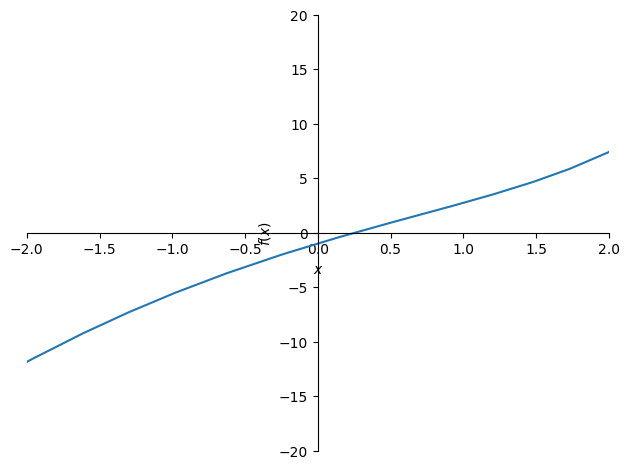

In [147]:
sp.plot(f_2_S(x),xlim=(-2.0,2.0),ylim=(-20,20))

Para obtener una aproximación de la solución dada la imposibilidad de calcularla de forma exacta, vamos a usar el Método de NR, utilizando una semilla adecuada para ello. Dicha semilla estará dentro del intervalo en el que se encuentre la solución (en el que haya un cambio de signo). Para ver dónde está la solución, ampliemos el gráfico

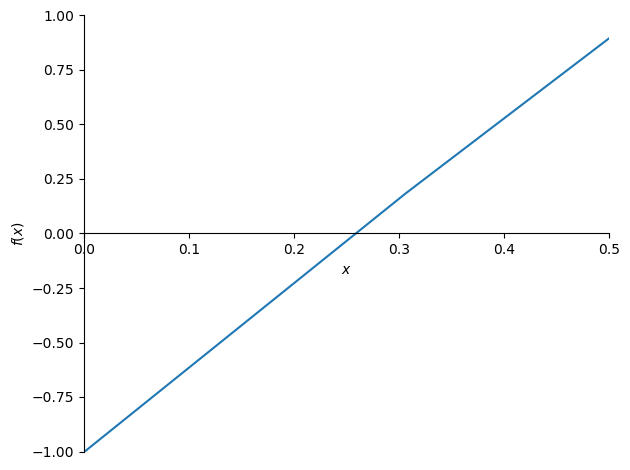

In [148]:
sp.plot(f_2_S(x),xlim=(0.0,0.5),ylim=(-1.0,1.0))

Claramente observamos que la función posee su raíz en el intervalo de amplitud 1, $[0.2,0.3]$. De hecho: 

In [149]:
sgn(f_2,0.2,0.3)

Sí hay cambio de signo: Hay raíz


Es por ello que elegiremos la semilla en este intervalo. Sea $x_{0} = 0.3$. Apliquemos el método de NR para hallar la aproximación de la solución con la tolerancia indicada:

In [150]:
# Calculemos la aproximación de la solución requerida
v_inic = 0.3
cifras = 6
nr = newton_raphson(v_inic,f_2,df_2,cifras,True)

Intervalo con maxima tolerancia. Aproximación solicitada:  0.257530
Numero de iteraciones requerido:  2


### Función 3

Hallemos en primer lugar las raíces de la función:

In [151]:
v3 = sol_exact(f_3_S,x,todas=True)

Se han encontrado : 0 soluciones


Veamos que aunque la función nos diga que no hay ninguna solución, sí que las hay. Prueba de ello viene dada por el siguiente gráfico:

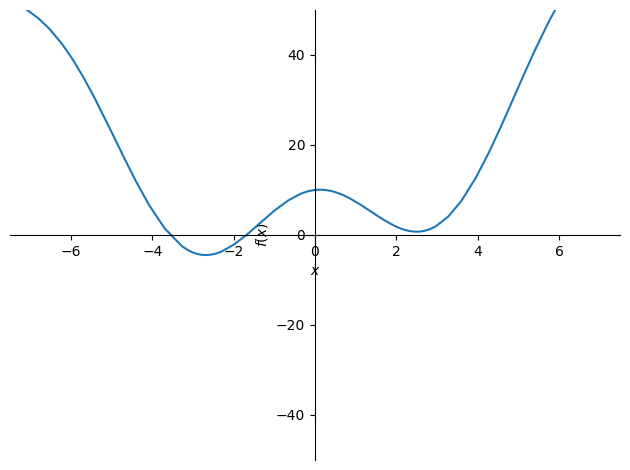

In [152]:
sp.plot(f_3_S(x),xlim=(-7.5,7.5),ylim=(-50,50))

Gráficamente observamos que corta al eje $OX$ en dos ocasiones. Una en el intervalo $[-4,-3]$ y otra en el intervalo $[-2,-1]$:

In [153]:
# Primer cambio de signo:
sgn(f_3,-4,-3)

Sí hay cambio de signo: Hay raíz


In [154]:
# Segundo cambio de signo:
sgn(f_3,-2,-1)

Sí hay cambio de signo: Hay raíz


Ampliemos la gráfica para tener una mejor visión a la hora de escoger semillas:

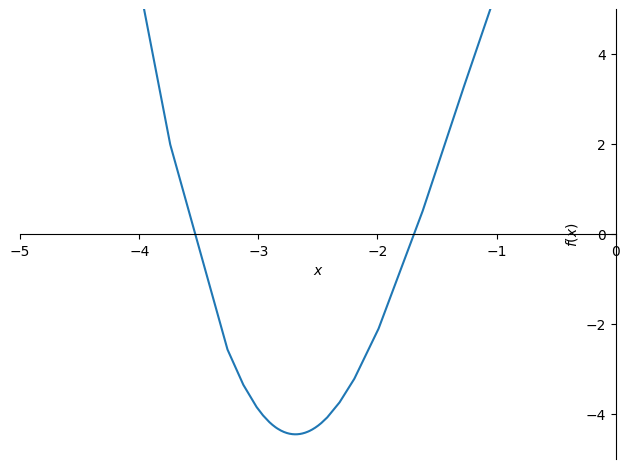

In [155]:
sp.plot(f_3_S(x),xlim=(-5,0),ylim=(-5.0,5.0))

#### Primera raíz (intervalo $[-4,-3]$)

Sea $x_{0} = -3.2$ la semilla para encontrar mediante NR la raíz del intervalo de amplitud unidad $[-4,-3]$. Apliquemos dicho método:

In [156]:
# Calculemos la aproximación de la solución requerida
v_inic = -3.2
cifras = 6
nr = newton_raphson(v_inic,f_3_S,df_3,cifras,True)

Intervalo con maxima tolerancia. Aproximación solicitada:  -3.56233149723641
Numero de iteraciones requerido:  5


#### Segunda raíz (intervalo $[-2,-1]$)

Sea $x_{0} = -1.6$ la semilla para encontrar mediante NR la raíz del intervalo de amplitud unidad $[-2,-1]$. Apliquemos dicho método:

In [157]:
# Calculemos la aproximación de la solución requerida
v_inic = -1.6
cifras = 6
nr = newton_raphson(v_inic,f_3_S,df_3,cifras,True)

Intervalo con maxima tolerancia. Aproximación solicitada:  -1.68693989979922
Numero de iteraciones requerido:  3


# EJERCICIO 4

Para la función  $ f(x)= 3 x^2+e^x-1$, 

i) encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos (tol =$10^{-4}$), y determine el número de iteraciones realizadas;

ii) encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$, partiendo de $x_0=0$, y determine el número de iteraciones realizadas.

Sea $f:\mathbb{R} \longrightarrow \mathbb{R}$ la aplicación dada por $f(x) = 3x^{2} + e^{x} -1$, continua y derivable ne todo su dominio de definición.

### Apartado i

In [158]:
# Definamos la función
def f_4(x):

    return 3*x**2 + np.exp(x) - 1

def f_4_S(x):

    return 3*x**2 + sp.exp(x) - 1

def df_4(x):

    return 6*x + np.exp(x)

En primer lugar vamos a comprobar que dicha función posee alguna raíz en el intervalo $[0,1]$. Para ello, vamos a comprobar si hay algún cabio de signo en dicho intervalo:

In [159]:
sgn(f_4,0,1)

No hay cambio de signo: No hay raíz


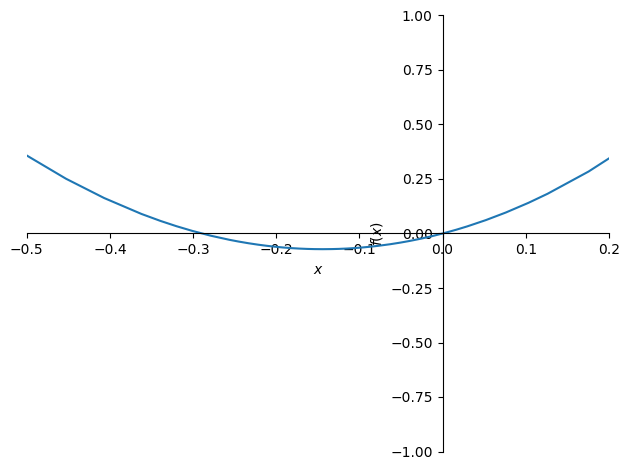

In [160]:
sp.plot(f_4_S(x),xlim=(-0.5,0.2),ylim=(-1.0,1.0))

Observamos que en $x = 0$

In [161]:
f_4(0)

0.0

Y por consiguiente, deducimos que tiene una raíz en el intervalo $[0,1]$ es $x=0$. En teoría no podríamos aplicar el método de bisección en el intervalo $[0,1]$ porque $f(0)\cdot f(1) = 0$. Es por ello que vamos a considerar el intervalo $[0 + \epsilon, 1]$ doonde $\epsilon$ va a ser un número positivo tan pequeño como queramos. Sea $\epsilon = 10^{-16}$. Vamos a aproximarnos a dicha solución con:

### Método de Bisección:

In [162]:
# Calculemos la aproximación de la solución requerida
epsilon = 10**(-20)
cifras = 4
v_inic, v_fin = epsilon,1
bise = biseccion(v_inic,v_fin,f_4_S,cifras,True)

MÉTODO DE BISECCIÓN APLICADO A LA ECUACIÓN:  3*x**2 + exp(x) - 1
Aproximación con decimales:  0.000976
Numero de iteraciones requerido:  10


### Método de Newton-Raphson

In [163]:
# Calculemos la aproximación de la solución requerida
v_inic = 0
cifras = 6
nr = newton_raphson(v_inic,f_4,df_4,cifras,True)

Intervalo con maxima tolerancia. Aproximación solicitada:  0
Numero de iteraciones requerido:  1


# EJERCICIO 5

Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):

i) $f(x)=x^7-x^4+2$ ,

ii) $f(x)=x^7+\cos  x-3$.

### Apartado i

Sea $f : \mathbb{R} \longrightarrow \mathbb{R}$ la aplicación dada por $f(x) = x^{7} - x^{4} + 2$, continua y derivable en todo su dominio.

Vamos a visualizar gráficamente los puntos en los que la función se anula. El teorema Fundamental del Álgebra nos dice que la función posee a lo sumo $7$ raíces, de las que nos interesan sólo las reales.

In [164]:
# Definición de la función y su derivada
def f_5i(x):

    return x**7 - x**4 + 2

def df_5i(x):

    return 7*x**6 - 4*x**3

Intentemos calcular de forma exacta dichas raíces previa visualización gráfica con nuestra función de python:

In [165]:
v5 = sol_exact(f_5i,x,todas=True)

Se han encontrado : 7 soluciones
Solución 1: -1.00000000000000
Solución 2: -0.713102145851293 - 0.98823188827156*I
Solución 3: -0.713102145851293 + 0.98823188827156*I
Solución 4: 1.06110281046036 - 0.376384046559108*I
Solución 5: 1.06110281046036 + 0.376384046559108*I
Solución 6: 0.151999335390936 - 1.01945594669063*I
Solución 7: 0.151999335390936 + 1.01945594669063*I


Observamos que nuestra función ha encontrado $1$ raíz real:

* $x_{1} = -1$

Procederemos entonces a aproximar dicha solución mediante el método de Newton-Raphson, por ejemplo. Elección que viene justificada por la rapidez (cuadrática) de este método frente al de bisección. Pero antes, observemos dicha raíz gráficamente:


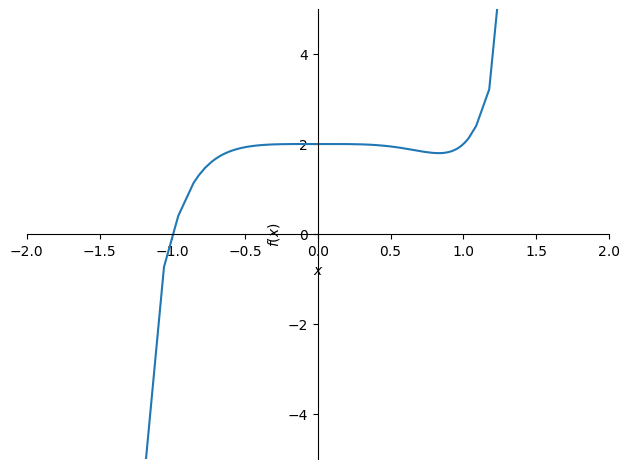

In [166]:
sp.plot(f_5i(x),xlim=(-2.0,2.0),ylim=(-5.0,5.0))

Observamos que:

* $x_{1} = -1 \in [-1.5,-0.5]$

Aproximemos por tanto por el método de Newton-Raphson dicha raíz.

Para ello, tomemos como semilla $x_{0} = -0.8$:

In [167]:
# Calculemos la aproximación de la solución requerida
v_inic = -0.8
cifras = 6
nr = newton_raphson(v_inic,f_5i,df_5i,cifras,True)

Intervalo con maxima tolerancia. Aproximación solicitada:  -1.00000
Numero de iteraciones requerido:  5


### Apartado ii

Sea $f : \mathbb{R} \longrightarrow \mathbb{R}$ la aplicación dada por $f(x) = x^{7} + cos(x) -3$, continua y derivable en todo su dominio.

Vamos a visualizar gráficamente los puntos en los que la función se anula. El teorema Fundamental del Álgebra nos dice que la función posee a lo sumo $7$ raíces, de las que nos interesan sólo las reales.

In [168]:
# Definición de la función y su derivada
def f_5ii(x):

    return x**7 + sp.cos(x) - 3

def df_5ii(x):

    return 7*x**6 - sp.sin(x)

Intentemos calcular de forma exacta dichas raíces previa visualización gráfica con nuestra función de python:

In [169]:
v5ii = sol_exact(f_5ii,x,todas=True)

No existen soluciones para esta ecuación : x**7 + cos(x) - 3


Observamos que nuestra función no ha sido capaz de determinar si la función tiene raíces reales o no. Es por ello que vamos a graficarla para observar como se comporta:

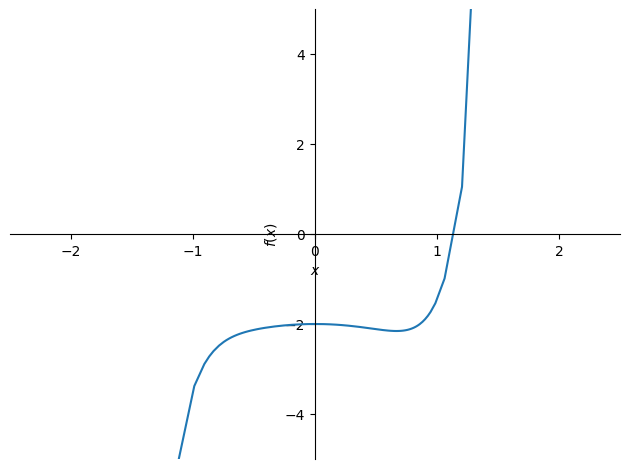

In [170]:
sp.plot(f_5ii(x),xlim=(-2.5,2.5),ylim=(-5.0,5.0))


Claramente se observa que la función tiene una raíz real en el intervalo $[1,2]$. Aproximémosla mediante el método de Newton-Raphson eligiendo como semilla el valor $x_{0} = 1.3$ por ejemplo:

In [171]:
# Calculemos la aproximación de la solución requerida
v_inic = 1.3
cifras = 6
nr = newton_raphson(v_inic,f_5ii,df_5ii,cifras,True)

Intervalo con maxima tolerancia. Aproximación solicitada:  1.14545980727001
Numero de iteraciones requerido:  5


# EJERCICIO 6

Aplicar los métodos de aceleración de la convergencia de Aitken y Steffensen (según los apuntes) a las sucesiones obtenidas para los distintos métodos programados en esta práctica y comparar los resultados. Para aplicar el método de aceleración de Steffensen, recuerde que para transformar cualquier ecuación de la forma  $ f(x)=0 $  en un problema de puntos fijos  $ g(x)=x $, la forma más simple puede ser definir  $g(x)=x \pm f(x)$.

Hemos modificado los métodos de bisección y Newton-Raphson para que devuelvan en forma de lista los elementos de las sucesiones $\{m_{n}\}_{n \geq 0}$ y $\{x_{n}\}_{n \geq 0}$ que generan dichos métodos respectivamente. Basándonos en dichas sucesiones se van a elaborar dos funciones de aceleración: una para la aceleración de Aitken y otra para la de Steffensen:

In [172]:
# Función de aceleración de la convergencia de Aitken.
def aceleraAitken(xn):

    x_new = []
    for i in range (len(xn)-2):
        x_new.append((xn[i]-(xn[i+1]-xn[i])**2/(xn[i+2]-2*xn[i+1]+xn[i])))

    return x_new

In [173]:
# Función de aceleración de la convergencia de Steffensen.
def aceleraSteffensen(niter,f,x0):
    g = lambda x: x - f(x)
    x_appx = [x0,f(x0),g(g(x0))]
    x_new  = []

    for i in range(niter):
        x0 = x_appx[0]-(x_appx[1]-x_appx[0])**2/(x_appx[2]-2*x_appx[1]+x_appx[0])
        x_appx = [x0,g(x0),g(g(x0))]
        x_new  = x_new + [x_appx[-1]]

    return x_new

A continuación aplicaremos el método de Bisección y el de Newton-Raphson a la función del primer ejercicio:

$f: \mathbb{R} \longrightarrow \mathbb{R}$ tal que $f(x) = x^{3} + 4x^{2} -10$

In [174]:
print("La función a la que se le aplica la aceleración es: ", f(x))

#Aplicación g del método de Steffensen
def g(x):

    return x-f(x)

La función a la que se le aplica la aceleración es:  x**3 + 4*x**2 - 10


In [175]:
help(biseccion)

Help on function biseccion in module __main__:

biseccion(a, b, f, cifras=16, muestra=True, nmax=100, prec=1e-16)



Comencemos en primer lugar con el método de **bisección**

In [176]:
# Intervalo en el que vamos a movernos:
a,b=1,2

#Aplicamos método de bisección
bisection = biseccion(a,b,f,False)

MÉTODO DE BISECCIÓN APLICADO A LA ECUACIÓN:  x**3 + 4*x**2 - 10
Se ha alcanzado la precisión requerida. Posible solución exacta:  1.365230013414097
Numero de iteraciones requerido:  50


In [177]:
# Iteraciones realizadas por el método de Bisección:
print("Iteraciones biseccion: {}".format((bisection)))

Iteraciones biseccion: [1.5, 1.25, 1.375, 1.3125, 1.34375, 1.359375, 1.3671875, 1.36328125, 1.365234375, 1.3642578125, 1.36474609375, 1.364990234375, 1.3651123046875, 1.36517333984375, 1.365203857421875, 1.365219116210938, 1.365226745605469, 1.365230560302734, 1.365228652954102, 1.365229606628418, 1.365230083465576, 1.365229845046997, 1.365229964256286, 1.365230023860931, 1.365229994058608, 1.36523000895977, 1.36523001641035, 1.36523001268506, 1.365230014547705, 1.365230013616382, 1.365230013150721, 1.365230013383552, 1.365230013499967, 1.36523001344176, 1.365230013412656, 1.365230013427208, 1.365230013419932, 1.365230013416294, 1.365230013414475, 1.365230013413566, 1.36523001341402, 1.365230013414248, 1.365230013414134, 1.365230013414077, 1.365230013414106, 1.365230013414092, 1.365230013414099, 1.365230013414096, 1.365230013414098, 1.365230013414097]


In [178]:
#Aceleramos la convergencia con Aitken:
aceleradorAitken = aceleraAitken(bisection)

print("Iteraciones aceleradas. Aitken: {}".format(aceleradorAitken))

Iteraciones aceleradas. Aitken: [1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.375, 1.375, 1.3645833333333333, 1.3645833333333333, 1.3645833333333333, 1.3645833333333333, 1.365234375, 1.365234375, 1.365234375, 1.365234375, 1.3652343750000018, 1.3652343749999991, 1.3652343749999978, 1.3652292887369792, 1.3652292887369792, 1.365230560302734, 1.3652299245198567, 1.3652299245198565, 1.365230083465577, 1.3652300039927157, 1.3652300039927159, 1.3652300238609276, 1.3652300139268234, 1.3652300139268234, 1.3652300139268232, 1.3652300126850607, 1.3652300133059414, 1.3652300136163813, 1.3652300134611624, 1.3652300133835509, 1.3652300134223574, 1.3652300134223574, 1.365230013412656, 1.365230013412656, 1.3652300134126578, 1.3652300134138688, 1.3652300134144781, 1.365230013414172, 1.3652300134140198, 1.3652300134140962, 1.3652300134140964, 1.3652300134140967, 1.3652300134140969, 1.365230013414097, 1.3652300134140973]


In [179]:
help(aceleraSteffensen)

Help on function aceleraSteffensen in module __main__:

aceleraSteffensen(niter, f, x0)
    # Función de aceleración de la convergencia de Steffensen.



In [180]:
#Ahora vamos con Steffensen
x0 = 1.0
n  = 10
aceleradorSteffensen = aceleraSteffensen(10,f,x0)

print("Iteraciones aceleradas. Steffensen: {}".format(aceleradorSteffensen))

Iteraciones aceleradas. Steffensen: [-191.7937760557271, -113.94577794657883, -57.09002701691815, -21.928629252692133, -4.989896652361394, 0.5268441739443108, 1.3445191345636853, 1.3652164826036757, 1.3652300134083228, 1.3652300134140969]


Veamos unaa comparación de los últimos elementos obtenidos con Bisección, Aitken y Steffensen:

In [181]:
print("Último elemento Bisección: ", bisection[len(bisection)-1])
print("\n")
print("Último elemento Aitken: ", aceleradorAitken[len(aceleradorAitken)-1])
print("\n")
print("Último elemento Steffensen: ", aceleradorSteffensen[len(aceleradorSteffensen)-1])


Último elemento Bisección:  1.365230013414097


Último elemento Aitken:  1.3652300134140973


Último elemento Steffensen:  1.3652300134140969


Es el turno ahora de **Newton-Rahpson**:

In [182]:
help(newton_raphson)

Help on function newton_raphson in module __main__:

newton_raphson(b, f, deriv, cifras=16, muestra=True, nmax=100, prec=1e-16)
    # Método de Newton-Raphson
    # Vamos a encapsular el método de Newton-Raphson en una función



In [183]:
# Necesitamos:
x0 = 1.0
cifras = 16
nr = newton_raphson(x0,f,deriv,cifras,False)

In [184]:
# Iteraciones del método:
print("Iteraciones Newton-Raphson: {}".format(nr))

Iteraciones Newton-Raphson: [1.0, 1.454545454545454, 1.368900401069519, 1.365236600202116, 1.365230013435367, 1.365230013414097]


In [185]:
#Aceleramos por Aitek:
aceleradorAitkenNR = aceleraAitken(nr)
print("Itraciones aceleradas Aitken: {}".format(aceleradorAitkenNR))

Itraciones aceleradas Aitken: [1.3824790831751388, 1.3650728623185282, 1.3652300015723764, 1.365230013414097]


In [186]:
#Aceleramos por Steffensen:
aceleradorSteffensenNR = aceleraSteffensen(10,f,x0)
print("Iteraciones aceleradas Steffensen: {}".format(aceleradorSteffensenNR))

Iteraciones aceleradas Steffensen: [-191.7937760557271, -113.94577794657883, -57.09002701691815, -21.928629252692133, -4.989896652361394, 0.5268441739443108, 1.3445191345636853, 1.3652164826036757, 1.3652300134083228, 1.3652300134140969]


Veamos unaa comparación de los últimos elementos obtenidos con Bisección, Aitken y Steffensen:

In [187]:
print("Último elemento Newton-Raphson: ", nr[len(nr)-1])
print("\n")
print("Último elemento Aitken: ", aceleradorAitkenNR[len(aceleradorAitkenNR)-1])
print("\n")
print("Último elemento Steffensen: ", aceleradorSteffensenNR[len(aceleradorSteffensenNR)-1])

Último elemento Newton-Raphson:  1.365230013414097


Último elemento Aitken:  1.365230013414097


Último elemento Steffensen:  1.3652300134140969


# EJERCICIO 7

Programar el método de Newton-Raphson acelerado, partiendo de cierto $x_0$ adecuado: $$x_{n+1}=x_n - m\frac{f(x_n)}{f'(x_n)}, \quad n=0,1,2,\ldots$$ para el caso de una raíz múltiple (de multiplicidad $m\in\mathbb{N}$) de una ecuación del tipo $f(x)=0$ y comparar los resultados
con los que se obtienen mediante el empleo de los métodos de aceleración habituales de Aitken y Steffensen (según los apuntes).

Sea la función $f: \mathbb{R} \longrightarrow \mathbb{R}$ dada por $f(x) = (x-\sqrt{6})\cdot (x-\sqrt{3})^{3}$.

 Vamos a centrar el problema en aproximar la raíz $x=\sqrt{3}$, con multiplicidad $m=3$, mediante el método de Newton-Raphson que habrá que modificar convenientemente como se indica en el enunciado, y compararemos los resultados con los obtenidos al acelerar por Aitken y Steffensen.

Tomemos el código del método de Newton-Raphson que hemos estado utilizando hasta ahora e introduzcamos la modificación que lo acelera:

In [188]:
# Método de Newton-Raphson acelerado
def newton_raphson_acelerado(b, f, deriv, m, cifras=16, muestra=True, nmax=100, prec=10**(-16)):

    x0=Decimal(b)
    
    tol = 10**(-cifras+1)

    getcontext().prec = cifras

    niter = 0
    terms = [b]

    for k in range(nmax):
        niter = niter + 1
        x1 = x0 - m*f(x0)/deriv(x0)  # método de Newton-Raphson
        terms.append(float(x1))
        if abs(x1-x0) < tol:
            p = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            p = 'precision'
            break
        else:
            x0 = x1

    if (muestra):
        #print("MÉTODO DE NEWTON-RAPHSON APLICADO A LA ECUACIÓN: ", f(x))
        if (p == "Precision"):
            print("Se ha alcanzado la precisión requerida. Posible aproximación: ", x1)
        else:
            print("Intervalo con maxima tolerancia. Aproximación solicitada: ", x1)

        print("Numero de iteraciones requerido: ", niter)

    getcontext().prec = mporig # Se restaura la precisión por defecto

    return terms

Definamos con código python la funció con la que vamos a desarrollas el ejercicio:

In [189]:
#Definimos f_7(x)
def f_7(x):

    return (x+120)*(x-3)**3

In [190]:
sp.diff((x+120)*(x-3)**3,x)

(x - 3)**3 + 3*(x - 3)**2*(x + 120)

In [191]:
#Definimos derivada de f_7
def df_7(x):

    return (x-3)**3 + 3*(x-3)** 2*(x+120)

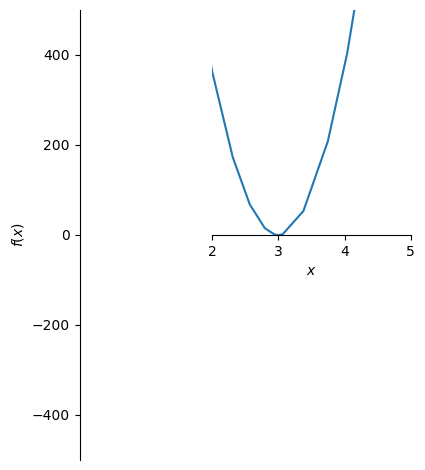

In [192]:
sp.plot(df_7(x),xlim=(2.0,5.0),ylim=(-500.0,500.0))

Comprobemos cuáles son las soluciones de forma exacta:

In [193]:
help(sol_exact)

Help on function sol_exact in module __main__:

sol_exact(f, x, todas=True)



In [194]:
sol = sol_exact(f_7,x)


Se han encontrado : 2 soluciones
Solución 1: -120.000000000000
Solución 2: 3.00000000000000


Claramente, al observar cómo hemos definido la función (expresada como producto de factores primos).

Apliquemos entonces el método de Newton-Raphson acelerado para aproximar la raíz $x=8$ tomando como semilla $x_{0} = 7.8$:

In [195]:
v7 = 7.9
cifras = 6
nra = newton_raphson_acelerado(v7,f_7,df_7,3,cifras)

Intervalo con maxima tolerancia. Aproximación solicitada:  3.00000
Numero de iteraciones requerido:  3


In [196]:
print("Iteraciones: {}".format(nra))

Iteraciones: [7.9, 3.06179, 3.00001, 3.0]


Calculemos ahora las iteraciones de Aitke y de Steffensen:

In [197]:
help(aceleraSteffensen)

Help on function aceleraSteffensen in module __main__:

aceleraSteffensen(niter, f, x0)
    # Función de aceleración de la convergencia de Steffensen.



In [198]:
aitken = aceleraAitken(nra)
steffe = aceleraSteffensen(len(nra),f_7,v7)

In [199]:
print("N-R: {}".format(nra))
print("Aitken:{}".format(aitken))
print("Steffensen: {}".format(steffe))

N-R: [7.9, 3.06179, 3.00001, 3.0]
Aitken:[2.999210916081677, 2.999999998381091]
Steffensen: [-5.07812729674046e+16, -5.078127353026771e+16, -5.078127409313086e+16, -5.078127465599398e+16]


# EJERCICIO 8

Programar el conocido algoritmo de Horner para la evaluación de un polinomio y emplearlo de forma reiterativa para el cálculo del desarrollo de Taylor de orden $ n$ de un polinomio cualquiera. Aprovecharlo también para programar una versión especial del método de Newton-Raphson para polinomios, evaluando tanto  $ p(x_k ) $ como $ p'(x_k)$ mediante el citado algoritmo y aplicarlo para aproximar alguna de las raíces reales del siguiente polinomio

$$p(x)=d_0 + d_1 x + d_2 x^2 + d_3 x^3+ d_4 x^4 + d_5 x^5 + d_6 x^6 + d_7 x^7 $$
(siendo $d_0, d_1, \ldots, d_7$ los dígitos ordenados de su DNI, pasaporte o tarjeta de residente).

Programar y construir también una sucesión de Sturm para dicho polinomio.

Sea el polinomio asociado a mi DNI:

In [200]:
#Defino el DNI
DNI = [7,8,0,0,6,0,1,1]

In [201]:
#Defino el polinomio asociado a mi DNI
def f_8(x):
    
    return 1+x+6*x**3+8*x**6+7*x**7

#Defino derivada de dicho polinomio
def df_8(x):

    return 1+18*x**2+48*x**5+49*x**6

Programemos entonces el algoritmo de Horner, para el que tendremos que extraer los coeficientes del polinomio. Para ello, vamos a crear una función de python que haga lo dicho:

In [202]:
#Función que extrae los coeficientes de un polinomio dado
def extrae_coef(poli):

    pol = str(poli)
    p = sp.Poly(pol)
    coeficientes = p.all_coeffs()
    return coeficientes 

In [203]:
coeficients = extrae_coef(f_8(x))
dfcoeficients = extrae_coef(df_8(x))
coeficients,dfcoeficients

([7, 8, 0, 0, 6, 0, 1, 1], [49, 48, 0, 0, 18, 0, 1])

Del mismo modo, será necesaria una función que haga la operación inversa: a partir de los coeficientes, halle el polinomio:

In [204]:
def makePolinomio(x,coefs):
    pol = coefs[0]
    for i in range(1,len(coefs)):
        pol = pol + coefs[i]*x**(i)

    return pol

Programemos ahora el algoritmo de Horner. El algoritmo de Horner consiste en aplicar la regla de Ruffini en un punto dado $x$, de manera que el resto que se obtiene al aplicar dicha regla coincide con el valor de $f(x)$. Expresemos esto en código python:

In [205]:
#Función para el Algoritmo de Horner
def horner(x0, coeficients, v=True):

    r = 0
    resultado = []
    
    for i in range(len(coeficients)):
        r = r*x0 + coeficients[i]
        resultado.append(r)
        
    resultado.pop()
    resultado.reverse()
    
    if v == False:
        return resultado, r

    return resultado[0],r

En primer lugar, vamos a calcular la expansión de Taylor del polinomio que tenemos entre manos, haciendo uso del algoritmo de Horner. Si bien sabemos, el desarrollo de Taylor de un polinomio de orden n, centrado en un punto a se define así:


$$P_{n}(x,a) = \sum_{k=0}^{n} \frac{f^{k}(a)}{k!}(x-a)^{k}$$

Lo curioso de esto es que los mismos restos obtenidos en el algoritmo de Horner coinciden con los coeficientes del desarrollo de Taylor: $\frac{f^{k}(a)}{k!}$. Teniendo esto en cuenta, vamos a implementar una función que lleve a cabo la expansión de Taylor:

In [206]:
#Función para la expansión de Taylor
def expansionTaylor(x,p,coeficientes):
    
    resultado,r = horner(p,coeficientes,False)
    resultado.reverse()
    coefi = [r]
 
    while (len(resultado)!=0):
        resultado, r = horner(p,resultado,False)
        resultado.reverse()
        coefi.append(r)
    
    poliTay = makePolinomio(x-p,coefi)
    
    return poliTay
        

Apliquemoslo entonces a un polinomio cualquiera. Sea por ejemplo el polinomio:

$$ p(x) = -2+3x-2x^{2}+5x^{3} $$

Sea el punto a = 1

In [207]:
def p_8(x):
    
    return -2 + 3*x -2*x**2+5*x**3

In [208]:
a = 1
c = extrae_coef(p_8(x))
c

[5, -2, 3, -2]

In [209]:
expansionTaylor(x,a,c)

14*x + 5*(x - 1)**3 + 13*(x - 1)**2 - 10

Apliquémoslo al Método de Newton-Raphson

In [210]:
# Método de Newton-Raphson con Horner
def nrHorner(b, coeficients, dfcoeficients, cifras=16, muestra=True, nmax=100, prec=10**(-16)):

    x0=Decimal(b)
    tol = 10**(-cifras+1)
    p = ""
    if cifras <= 0:
        cifras = calc_cifras(prec)

    niter = 0
    terms = [b]

    for k in range(nmax):
        niter = niter + 1
        coc1,res1 = horner(x0, coeficients)
        res1,coc1 = Decimal(str(res1)),Decimal(str(coc1))
        coc2,res2 = horner(x0, dfcoeficients)
        res2,coc2 = Decimal(str(res2)),Decimal(str(coc2))
        x1 = x0 - (coc1*(x0-x0)+res1)/(coc2*(x0-x0)+res2)  # método de Newton-Raphson
        terms.append(float(x1))
        coeficients.reverse()
        if abs(x1-x0) < tol:
            p = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            p = 'precision'
            break
        else:
            x0 = x1
        coeficients.reverse()

    if (muestra):
        #print("MÉTODO DE NEWTON-RAPHSON APLICADO A LA ECUACIÓN: ", f(x))
        if (p == "Precision"):
            print("Se ha alcanzado la precisión requerida. Posible aproximación: ", x1)
        else:
            print("Intervalo con maxima tolerancia. Aproximación solicitada: ", x1)

        print("Numero de iteraciones requerido: ", niter)

    getcontext().prec = mporig # Se restaura la precisión por defecto

    return niter,terms

Una vez definido este método, vamos a proceder a lo que se nos pide en el ejercicio:

Dado el polinomio de coeficientes los dígitos de nuestro DNI, $f_8(x)$, vamos a calcular con nuestra función python $exact\_sol$, las raíces de dicho polinomio. Elegiremos una de ellas y aplicaremos el método que acabamos de programar: **nrHorner**:

In [211]:
#Calculamos raíces del polinomio
sol = sol_exact(f_8,x)

Se han encontrado : 7 soluciones
Solución 1: -0.460296567020067
Solución 2: -1.0553689564424 - 0.537058091016701*I
Solución 3: -1.0553689564424 + 0.537058091016701*I
Solución 4: 0.570014555886356 - 0.526228211118041*I
Solución 5: 0.570014555886356 + 0.526228211118041*I
Solución 6: 0.144074112637507 - 0.589071553454556*I
Solución 7: 0.144074112637507 + 0.589071553454556*I


De siete soluciones que tiene, solo una es real. Comprobemos este hecho gŕaficamente:

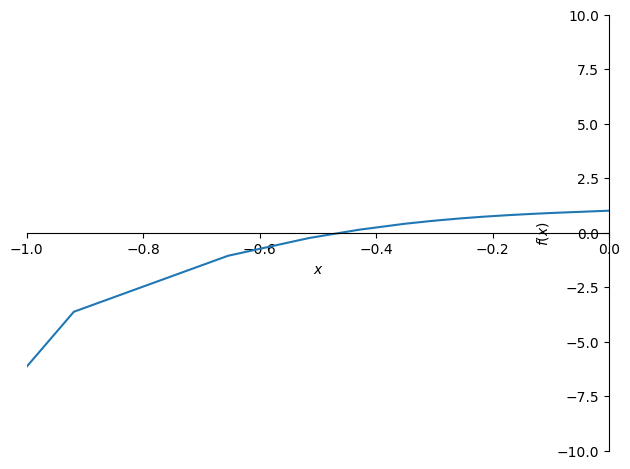

In [212]:
sp.plot(f_8(x),xlim=(-1,0),ylim=(-10,10))

In [213]:
#Aplicamos el método de N-R con Horner
#Identificamos semilla
k = -0.6
#Aplicamos el método de NR
c = coeficients.reverse()
d = dfcoeficients.reverse()
n, iteraciones = nrHorner(k, coeficients, dfcoeficients)

Intervalo con maxima tolerancia. Aproximación solicitada:  -2.172512401024282268744377538
Numero de iteraciones requerido:  61


Por último, vamos a programar el algoritmo para la obtención de los polinomios de Sturm y se aplicará al polinomio de coeficientes los dígitos de nuestro DNI. Una sucesión de Sturn consta de: el polinomio, su derivada, y a continuación el resto cambiado de signo de la división del término $n-2$ y el $n-1$. El último elemento de la sucesión ha de ser constante:

In [214]:
# Función que calcula la sucesión de Sturm de un polinomio dado
def sturm(poli,x):
    
    f0 = poli
    f1 = sp.Poly(sp.diff(poli,x))
    
    #Sucesion de sturm
    st = [f0,f1]
    
    #Siguiente elemento
    fn = f0 % f1
    fn = sp.Poly(-fn) #Cambiar signo
    
    #Se seguirá calculando hasta que se llegue a una constante o hasta que el
    # cociente sea 0
    while((sp.degree(fn,x) != -sp.oo) or (fn == f0)):
        st.append(fn)
        f0,f1 = f1,fn
        #Hacemos lo mismo que antes
        fn = f0 % f1
        fn = sp.Poly(-fn) #Cambiar signo
        
    #Devolvemos objeto
    return st

In [215]:
#Polinomio que nos incumbe
poli_dni = sp.Poly(makePolinomio(x,coeficients),x)

#Sucesión de Sturm
s = sturm(poli_dni,x)
for i in range(len(s)):
    print("f{}(x) = {}".format(i+1,s[i].as_expr()))

f1(x) = x**7 + x**6 + 6*x**4 + 8*x + 7
f2(x) = 7*x**6 + 6*x**5 + 24*x**3 + 8
f3(x) = 6*x**5/49 - 18*x**4/7 + 24*x**3/49 - 48*x/7 - 335/49
f4(x) = -3185*x**4 + 588*x**3 - 392*x**2 - 53753*x/6 - 17101/2
f5(x) = -864*x**3/207025 + 6361*x**2/207025 + 3414*x/207025 - 1216/207025
f6(x) = 135328309025*x**2/746496 + 11795663425*x/124416 - 275550275/11664
f7(x) = 1719564609024*x/1360946836488785 + 28046822552064/17692308874354205
f8(x) = -20361891979817719948020775/142597533015425442816
